<a href="https://colab.research.google.com/github/arpan2233/Deep-Learning/blob/main/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
# Load California Housing dataset
california = fetch_california_housing()
X = california.data  # Features
y = california.target  # Target (house prices)

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
tree_mse = DecisionTreeRegressor(criterion='squared_error', random_state=42)
tree_mse.fit(X_train, y_train)
y_pred_mse = tree_mse.predict(X_test)

# Calculate Errors
mse_mse = mean_squared_error(y_test, y_pred_mse)
mae_mse = mean_absolute_error(y_test, y_pred_mse)
print(f"Decision Tree (MSE) -> MSE: {mse_mse:.4f}, MAE: {mae_mse:.4f}")


Decision Tree (MSE) -> MSE: 0.4952, MAE: 0.4547


In [5]:
tree_mae = DecisionTreeRegressor(criterion='absolute_error', random_state=42)
tree_mae.fit(X_train, y_train)
y_pred_mae = tree_mae.predict(X_test)

# Calculate Errors
mse_mae = mean_squared_error(y_test, y_pred_mae)
mae_mae = mean_absolute_error(y_test, y_pred_mae)
print(f"Decision Tree (MAE) -> MSE: {mse_mae:.4f}, MAE: {mae_mae:.4f}")


Decision Tree (MAE) -> MSE: 0.5252, MAE: 0.4691


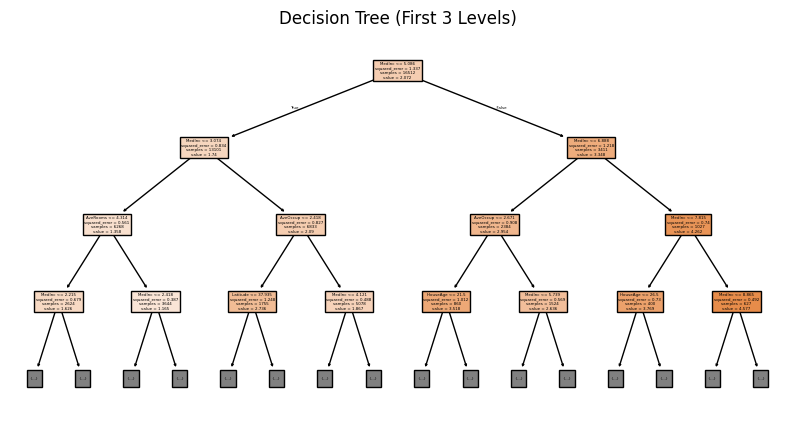

In [7]:
plt.figure(figsize=(10, 5))
plot_tree(tree_mse, filled=True, feature_names=california.feature_names, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()


Unlike classification (which uses Gini or Entropy), regression trees use Mean Squared Error (MSE) or Mean Absolute Error (MAE).

CART Cost Function for Regression
At each node, the tree finds the best split by minimizing:

MSE (default in sklearn)

𝑀
𝑆
𝐸
=
1
𝑁
∑
(
𝑦
𝑖
−
𝑦
^
)
2
MSE=
N
1
​
 ∑(y
i
​
 −
y
^
​
 )
2

 Advantage: Penalizes larger errors more.
 Disadvantage: Sensitive to outliers (squared term makes large errors dominate).

MAE (alternative)

𝑀
𝐴
𝐸
=
1
𝑁
∑
∣
𝑦
𝑖
−
𝑦
^
∣
MAE=
N
1
​
 ∑∣y
i
​
 −
y
^
​
 ∣
 Advantage: Less sensitive to outliers.
 Disadvantage: Harder to optimize mathematically (non-differentiable at zero).